**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressWarnings(suppressMessages(library("GenomicRanges")))
library("UpSetR")
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
dir(fdiry)

[1] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
 [2] "peak.annotation.crispri_casa_peak.bed.gz"                              
 [3] "peak.annotation.enhancer_junke_peak_astarr.bed.gz"                     
 [4] "peak.annotation.enhancer_junke_peak_wstarr.bed.gz"                     
 [5] "peak.annotation.gencode_v24_tes.bed.gz"                                
 [6] "peak.annotation.gencode_v24_tss.bed.gz"                                
 [7] "peak.annotation.screen.tsv"                                            
 [8] "peak.summary.crispri_casa_peak.tsv"                                    
 [9] "peak.summary.enhancer_junke_peak_astarr.tsv"                           
[10] "peak.summary.enhancer_junke_peak_wstarr.tsv"                           
[11] "peak.summary.gencode_v24_tes.tsv"                                      
[12] "peak.summary.gencode_v24_tss.tsv"

## Import data

In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_peak_atac_wgs = dat
print(dim(dat))
head(dat)

[1] 247520      3


Chrom,Start,End
<chr>,<dbl>,<dbl>
chr1,10015,10442
chr1,14253,14645
chr1,16015,16477
chr1,17237,17772
chr1,28903,29613
chr1,30803,31072


In [4]:
fdiry = file.path(FD_RES, "results", "region")
fname = "region_screened_tmpra.bed"
fpath = file.path(fdiry, fname)
print(fpath)

cnames = c("Chrom", "Start", "End", "Gene")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_range_tmpra = dat
print(dim(dat))
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/region_screened_tmpra.bed"
[1] 8 4


Chrom,Start,End,Gene
<chr>,<dbl>,<dbl>,<chr>
chr11,4505501,6505900,HBE1
chr11,32869701,34870100,LMO2
chr11,61787329,61898348,FADS
chr16,10001,1173100,HBA2
chr2,59553301,61553700,BCL11A
chr20,56391301,58391700,RBM38


In [5]:
fdiry = file.path(FD_RES, "results", "region")
fname = "region_screened_crispri_flowfish.bed"
fpath = file.path(fdiry, fname)
print(fpath)

cnames = c("Chrom", "Start", "End", "Gene")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_range_crispr = dat
print(dim(dat))
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/region_screened_crispri_flowfish.bed"
[1] 13  4


Chrom,Start,End,Gene
<chr>,<dbl>,<dbl>,<chr>
chr11,4091884,6419310,"HBE1,HBG1,HBG2,HBS1L,MYB"
chr11,33064196,34664117,"CAPRIN1,CAT,LMO2"
chr11,61788524,61897153,"FADS1,FADS2,FADS3,FEN1"
chr12,54300766,54301042,"GATA1,HDAC6"
chr12,110726151,112325737,ERP29
chr19,12887110,12887237,"GATA1,HDAC6"


In [6]:
fdiry = file.path(FD_RES, "results", "CRISPRi_FlowFISH", "coverage")
fname = "Merge_HCRFF_rAVG.log2FC_2.filtered.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Name", "Score", "Gene")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_crispr_log2fc_filter = dat
print(dim(dat))
head(dat)

[1] 610960      6


Chrom,Start,End,Name,Score,Gene
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr11,33064196,33064197,id-1495,0.807624,CAPRIN1
chr11,33064217,33064218,id-1496,-2.712460,CAPRIN1
chr11,33064229,33064230,id-1497,0.642045,CAPRIN1
chr11,33064230,33064231,id-1498,1.853540,CAPRIN1
chr11,33064258,33064259,id-1499,0.126467,CAPRIN1
chr11,33064264,33064265,id-1500,0.217096,CAPRIN1


In [12]:
fdiry = file.path(FD_RES, "results", "region", "annotation_crispri_casa")
fname = "crispri_casa_peak.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_crispr_casa = dat
print(dim(dat))
head(dat)

[1] 113   8


Chrom,Start,End,Name,Score,Strand,Gene_Symbol,Gene_ENS
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr11,33944871,33945471,chr11:33944871-33945471,0.8037646,.,CAPRIN1,ENSG00000135387
chr11,34050971,34051471,chr11:34050971-34051471,0.9739873,.,CAPRIN1,ENSG00000135387
chr11,34051571,34054171,chr11:34051571-34054171,2.0642907,.,CAPRIN1,ENSG00000135387
chr11,34085871,34086871,chr11:34085871-34086871,1.0092724,.,CAPRIN1,ENSG00000135387
chr11,33944868,33945268,chr11:33944868-33945268,1.2146755,.,CAT,ENSG00000121691
chr11,34437468,34440568,chr11:34437468-34440568,3.2866681,.,CAT,ENSG00000121691


In [13]:
fdiry = file.path(FD_RES, "results", "CRISPRi_FlowFISH", "coverage")
fname = "Merge_HCRFF_rAVG.log2FC_2.filtered.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Name", "Score", "Gene")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_crispr_log2fc_filter = dat
print(dim(dat))
head(dat)

[1] 610960      6


Chrom,Start,End,Name,Score,Gene
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr11,33064196,33064197,id-1495,0.807624,CAPRIN1
chr11,33064217,33064218,id-1496,-2.712460,CAPRIN1
chr11,33064229,33064230,id-1497,0.642045,CAPRIN1
chr11,33064230,33064231,id-1498,1.853540,CAPRIN1
chr11,33064258,33064259,id-1499,0.126467,CAPRIN1
chr11,33064264,33064265,id-1500,0.217096,CAPRIN1


In [14]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.crispri_casa_peak.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_summary_crispri = dat
print(dim(dat))
head(dat)

[1] 87  6


Peak,CASA,Score,Gene_Symbol,Gene_ENS,Overlap
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
chr11_5249943_5250880,chr11_5249847_5250847,1.890890,HBG1,ENST00000330597.5,904
chr11_5249943_5250880,chr11_5249847_5250847,1.922956,HBG2,ENST00000336906.6,904
chr11_5254190_5254453,chr11_5253647_5254647,1.504404,HBG1,ENST00000330597.5,263
chr11_5254190_5254453,chr11_5253647_5254647,1.430535,HBG2,ENST00000336906.6,263
chr11_5269440_5270695,chr11_5269147_5271147,1.906478,HBE1,ENST00000336906.6,1255
chr11_5275424_5276195,chr11_5275847_5276247,1.173871,HBG1,ENST00000330597.5,348


In [15]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.enhancer_junke_peak_astarr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_count_enhancer_astarr = dat
print(dim(dat))
head(dat)

[1] 17120     4


Peak,Name,Count,Annotate
<chr>,<chr>,<dbl>,<chr>
chr10_100373060_100374238,Enhancer_ASTARR,1,chr10_100373870_100374180
chr10_100528900_100530538,Enhancer_ASTARR,1,chr10_100529840_100529950
chr10_100535377_100536237,Enhancer_ASTARR,1,chr10_100535730_100536000
chr10_100630761_100631892,Enhancer_ASTARR,2,"chr10_100631300_100631320,chr10_100631350_100631370"
chr10_100636566_100638239,Enhancer_ASTARR,2,"chr10_100637440_100637480,chr10_100637490_100637550"
chr10_101060309_101063187,Enhancer_ASTARR,2,"chr10_101060690_101060710,chr10_101060740_101060830"


In [16]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.enhancer_junke_peak_wstarr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_count_enhancer_wstarr = dat
print(dim(dat))
head(dat)

[1] 20688     4


Peak,Name,Count,Annotate
<chr>,<chr>,<dbl>,<chr>
chr10_100185017_100187275,Enhancer_WSTARR,2,"chr10_100185920_100186270,chr10_100186350_100186370"
chr10_100267066_100268374,Enhancer_WSTARR,3,"chr10_100267610_100267630,chr10_100267660_100267720,chr10_100267760_100267780"
chr10_100285974_100287341,Enhancer_WSTARR,1,chr10_100286910_100286920
chr10_100346328_100347693,Enhancer_WSTARR,1,chr10_100346800_100347090
chr10_100370571_100371646,Enhancer_WSTARR,1,chr10_100371470_100371490
chr10_100373060_100374238,Enhancer_WSTARR,3,"chr10_100373130_100373160,chr10_100373430_100373470,chr10_100373690_100374250"


In [21]:
dat = dat_peak_summary_crispri
print(nrow(dat))

dat = dat_peak_summary_crispri
dat = dat %>% dplyr::select(CASA) %>% distinct
print(nrow(dat))

dat = dat_peak_summary_crispri
dat = dat %>% dplyr::select(Peak) %>% distinct
print(nrow(dat))

[1] 87
[1] 77
[1] 57


In [22]:
77/113

[1] 0.6814159

In [12]:
dat = dat_peak_atac_wgs
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$Start, 
        end   = dat$End
    )
)

grg_peak_atac_wgs = grg
grg

GRanges object with 247520 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1         10015-10442      *
       [2]     chr1         14253-14645      *
       [3]     chr1         16015-16477      *
       [4]     chr1         17237-17772      *
       [5]     chr1         28903-29613      *
       ...      ...                 ...    ...
  [247516]     chrX 156009687-156010227      *
  [247517]     chrX 156016391-156016836      *
  [247518]     chrX 156024950-156025593      *
  [247519]     chrX 156030187-156030740      *
  [247520]     chrY   11215098-11215422      *
  -------
  seqinfo: 83 sequences from an unspecified genome; no seqlengths

In [13]:
dat = dat_range_tmpra
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$Start, 
        end   = dat$End
    )
)

grg_range_tmpra = grg
grg

GRanges object with 8 ranges and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]    chr11     4505501-6505900      *
  [2]    chr11   32869701-34870100      *
  [3]    chr11   61787329-61898348      *
  [4]    chr16       10001-1173100      *
  [5]     chr2   59553301-61553700      *
  [6]    chr20   56391301-58391700      *
  [7]     chr8 126735901-128736550      *
  [8]     chrX   47785501-49880650      *
  -------
  seqinfo: 6 sequences from an unspecified genome; no seqlengths

In [14]:
dat = dat_range_crispr
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$Start, 
        end   = dat$End
    )
)

grg_range_crispr = grg
grg

GRanges object with 13 ranges and 0 metadata columns:
       seqnames              ranges strand
          <Rle>           <IRanges>  <Rle>
   [1]    chr11     4091884-6419310      *
   [2]    chr11   33064196-34664117      *
   [3]    chr11   61788524-61897153      *
   [4]    chr12   54300766-54301042      *
   [5]    chr12 110726151-112325737      *
   ...      ...                 ...    ...
   [9]     chr5   87611207-89911163      *
  [10]     chr6 108840570-109828800      *
  [11]     chr6 134253831-136927585      *
  [12]     chr8 126736094-128735225      *
  [13]     chrX   48397930-49656988      *
  -------
  seqinfo: 9 sequences from an unspecified genome; no seqlengths

In [28]:
### construct a granges object of the guides
dat = dat_crispr_log2fc_filter
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$Start, 
        end   = dat$End
    )
)
grg$Name = dat$Gene

### assign and show
grg_crispr_guides = grg
print(length(grg))
print(grg)

[1] 610960
GRanges object with 610960 ranges and 1 metadata column:
           seqnames              ranges strand |        Name
              <Rle>           <IRanges>  <Rle> | <character>
       [1]    chr11   33064196-33064197      * |     CAPRIN1
       [2]    chr11   33064217-33064218      * |     CAPRIN1
       [3]    chr11   33064229-33064230      * |     CAPRIN1
       [4]    chr11   33064230-33064231      * |     CAPRIN1
       [5]    chr11   33064258-33064259      * |     CAPRIN1
       ...      ...                 ...    ... .         ...
  [610956]     chr8 128731456-128731457      * |        PVT1
  [610957]     chr8 128732458-128732459      * |        PVT1
  [610958]     chr8 128732691-128732692      * |        PVT1
  [610959]     chr8 128733323-128733324      * |        PVT1
  [610960]     chr8 128735224-128735225      * |        PVT1
  -------
  seqinfo: 9 sequences from an unspecified genome; no seqlengths


In [24]:
head(dat_crispr_casa)

Chrom,Start,End,Name,Score,Strand,Gene_Symbol,Gene_ENS
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr11,33944871,33945471,chr11:33944871-33945471,0.8037646,.,CAPRIN1,ENSG00000135387
chr11,34050971,34051471,chr11:34050971-34051471,0.9739873,.,CAPRIN1,ENSG00000135387
chr11,34051571,34054171,chr11:34051571-34054171,2.0642907,.,CAPRIN1,ENSG00000135387
chr11,34085871,34086871,chr11:34085871-34086871,1.0092724,.,CAPRIN1,ENSG00000135387
chr11,33944868,33945268,chr11:33944868-33945268,1.2146755,.,CAT,ENSG00000121691
chr11,34437468,34440568,chr11:34437468-34440568,3.2866681,.,CAT,ENSG00000121691


In [25]:
### construct a granges object of the guides
dat = dat_crispr_casa
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$Start, 
        end   = dat$End
    )
)
grg$Name = dat$Gene_Symbol

### assign and show
grg_crispr_casa = grg
print(length(grg))
print(grg)

[1] 113
GRanges object with 113 ranges and 1 metadata column:
        seqnames              ranges strand |        Name
           <Rle>           <IRanges>  <Rle> | <character>
    [1]    chr11   33944871-33945471      * |     CAPRIN1
    [2]    chr11   34050971-34051471      * |     CAPRIN1
    [3]    chr11   34051571-34054171      * |     CAPRIN1
    [4]    chr11   34085871-34086871      * |     CAPRIN1
    [5]    chr11   33944868-33945268      * |         CAT
    ...      ...                 ...    ... .         ...
  [109]     chr8 128057569-128058469      * |        PVT1
  [110]     chr8 128058869-128059269      * |        PVT1
  [111]     chr8 128059469-128059669      * |        PVT1
  [112]     chr8 128066469-128066869      * |        PVT1
  [113]     chr8 128077069-128077269      * |        PVT1
  -------
  seqinfo: 7 sequences from an unspecified genome; no seqlengths


In [26]:
grg = grg_crispr_casa
reduce(grg)

GRanges object with 80 ranges and 0 metadata columns:
       seqnames            ranges strand
          <Rle>         <IRanges>  <Rle>
   [1]    chr11   5248847-5249047      *
   [2]    chr11   5249847-5250847      *
   [3]    chr11   5253147-5253547      *
   [4]    chr11   5253647-5254647      *
   [5]    chr11   5269147-5271147      *
   ...      ...               ...    ...
  [76]     chr4 55631941-55633941      *
  [77]     chr4 55634441-55640941      *
  [78]     chr4 55666941-55667441      *
  [79]     chr4 55670441-55671441      *
  [80]     chr4 55810941-55811941      *
  -------
  seqinfo: 7 sequences from an unspecified genome; no seqlengths

In [45]:
grg = grg_peak_atac_wgs

res = GenomicRanges::findOverlaps(grg, grg_range_tmpra)
idx = unique(queryHits(res))
grg = grg[idx]

print(length(idx))

res = GenomicRanges::findOverlaps(grg, grg_guides_total)
idx = unique(queryHits(res))
grg = grg[idx]

print(length(idx))

dat = data.frame(
    Chrom = seqnames(grg),
    Start = start(grg),
    End   = end(grg)
)
dat = dat %>% dplyr::mutate(Peak = paste(Chrom, Start, End, sep="_"))

dat_peak_overlap = dat
print(dim(dat))
head(dat)

[1] 1722
[1] 632
[1] 632   4


,Chrom,Start,End,Peak
,<fct>,<int>,<int>,<chr>
1,chr11,4539569,4540043,chr11_4539569_4540043
2,chr11,4607676,4608647,chr11_4607676_4608647
3,chr11,4626130,4626814,chr11_4626130_4626814
4,chr11,4636783,4637731,chr11_4636783_4637731
5,chr11,4658480,4659558,chr11_4658480_4659558
6,chr11,4801687,4802066,chr11_4801687_4802066


In [54]:
sum(lengths(reduce(grg)))

[1] 589059

In [55]:
dat0 = dat_peak_overlap
dat1 = dat_peak_summary_crispri
dat2 = bind_rows(
    dat_peak_count_enhancer_astarr, 
    dat_peak_count_enhancer_wstarr)

lst = list(
    `Open Chromatin Regions`           = unique(dat0$Peak),
    `CRISPR Hits`                      = unique(intersect(dat1$Peak, dat0$Peak)),
    `Enhancer Calls (ASTARR + WSTARR)` = unique(intersect(dat2$Peak, dat0$Peak))
)

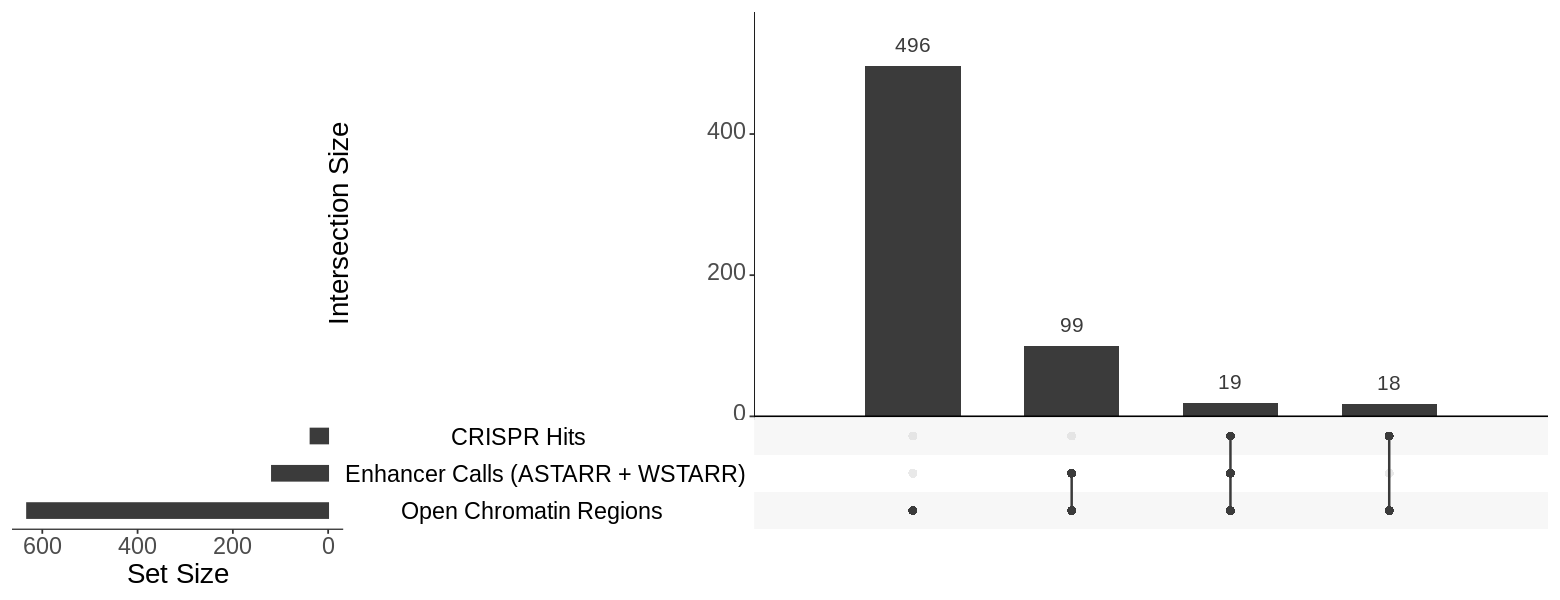

In [56]:
options(repr.plot.height=5, repr.plot.width=13)
upset(fromList(lst), order.by = "freq", text.scale = 2)

In [57]:
dat0 = dat_peak_overlap
dat1 = dat_peak_summary_crispri
dat2 = dat_peak_count_enhancer_astarr
dat3 = dat_peak_count_enhancer_wstarr


lst = list(
    `Open Chromatin Regions`  = unique(dat0$Peak),
    `CRISPR Hits (CASA)`      = unique(intersect(dat1$Peak, dat0$Peak)),
    `Enhancer calls (ASTARR)` = unique(intersect(dat2$Peak, dat0$Peak)),
    `Enhancer calls (WSTARR)` = unique(intersect(dat3$Peak, dat0$Peak))
)

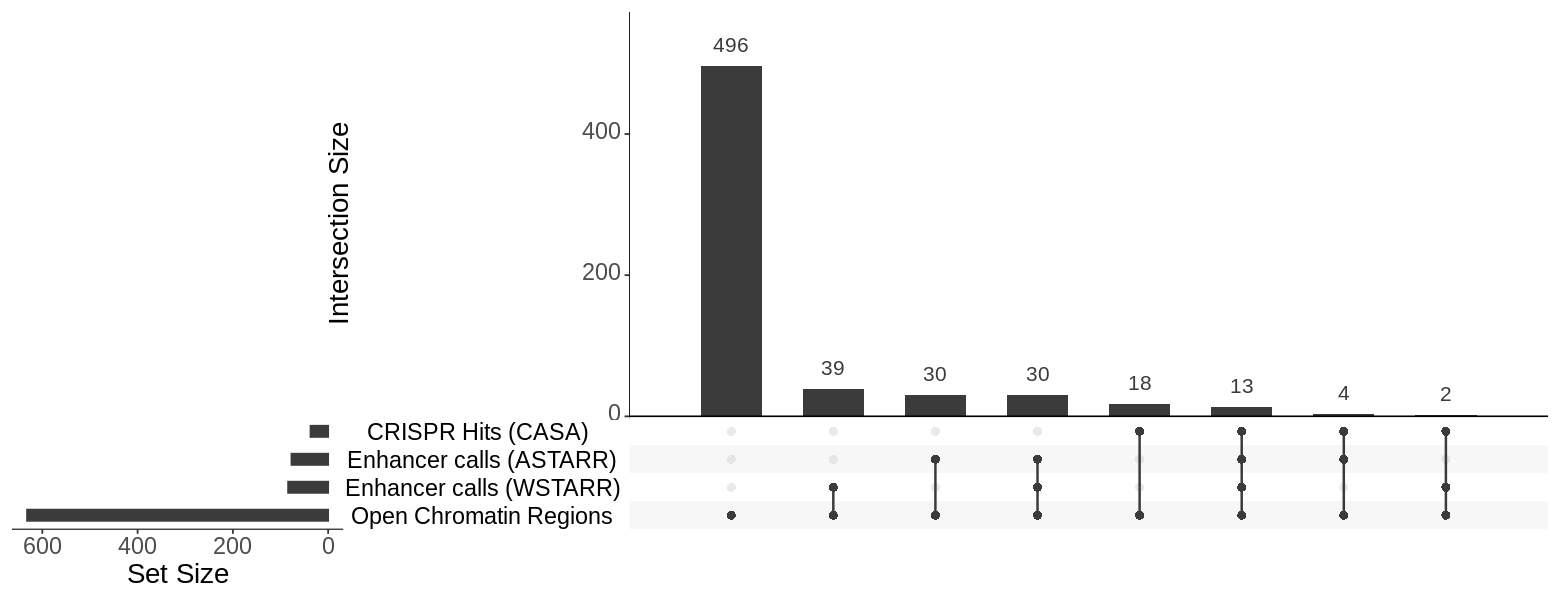

In [58]:
options(repr.plot.height=5, repr.plot.width=13)
upset(fromList(lst), order.by = "freq", text.scale = 2)